In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file=pd.read_csv("C:\\Users\\Admin\\Desktop\\yuvan\\PYTHON\\DATA_ANALYSIS_PROJECT\\file.csv")
print(file.head(10))

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   
5  1/1/2012 5:00    -1.4              -3.3         87                9   
6  1/1/2012 6:00    -1.5              -3.1         89                7   
7  1/1/2012 7:00    -1.4              -3.6         85                7   
8  1/1/2012 8:00    -1.4              -3.6         85                9   
9  1/1/2012 9:00    -1.3              -3.1         88               15   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  

In [3]:
#CONVERTING DATE/TIME INTO DATE OBJECT
file['Date/Time'] = pd.to_datetime(file['Date/Time'])
file['Date/Time'] = file['Date/Time'].dt.date   
print(file['Date/Time'].head())

0    2012-01-01
1    2012-01-01
2    2012-01-01
3    2012-01-01
4    2012-01-01
Name: Date/Time, dtype: object


In [4]:
daily_avg_temp=file.groupby('Date/Time')['Temp_C'].mean().reset_index()
daily_max_temp=file.groupby('Date/Time')['Temp_C'].max().reset_index()
daily_min_temp=file.groupby('Date/Time')['Temp_C'].min().reset_index()

In [5]:
print(daily_avg_temp)

      Date/Time     Temp_C
0    2012-01-01   0.629167
1    2012-01-02   0.041667
2    2012-01-03 -14.416667
3    2012-01-04 -13.645833
4    2012-01-05  -6.750000
..          ...        ...
361  2012-12-27  -5.833333
362  2012-12-28  -6.775000
363  2012-12-29 -11.345833
364  2012-12-30 -11.370833
365  2012-12-31  -5.604167

[366 rows x 2 columns]


In [6]:

print(daily_max_temp.head())

    Date/Time  Temp_C
0  2012-01-01     5.3
1  2012-01-02     5.2
2  2012-01-03    -9.0
3  2012-01-04    -7.6
4  2012-01-05    -4.1


In [7]:

print(daily_min_temp.head())

    Date/Time  Temp_C
0  2012-01-01    -1.8
1  2012-01-02    -7.4
2  2012-01-03   -17.3
3  2012-01-04   -18.6
4  2012-01-05    -9.9


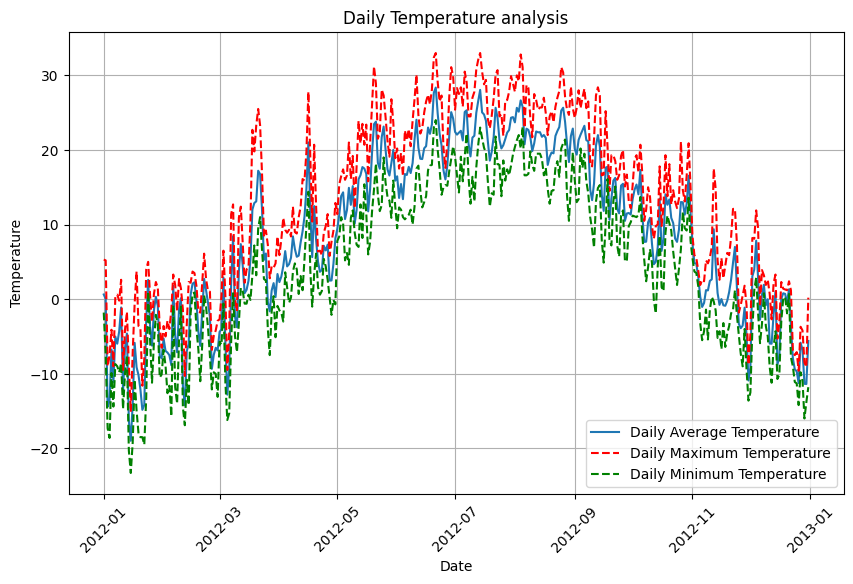

In [10]:
plt.figure(figsize=(30,25))



In [13]:
daily_weather_temp = file.groupby('Date/Time')['Weather'].agg(lambda x: x.mode()[0]).reset_index()
print(daily_weather_temp.head())


    Date/Time        Weather
0  2012-01-01            Fog
1  2012-01-02  Mostly Cloudy
2  2012-01-03   Mainly Clear
3  2012-01-04           Snow
4  2012-01-05   Mainly Clear


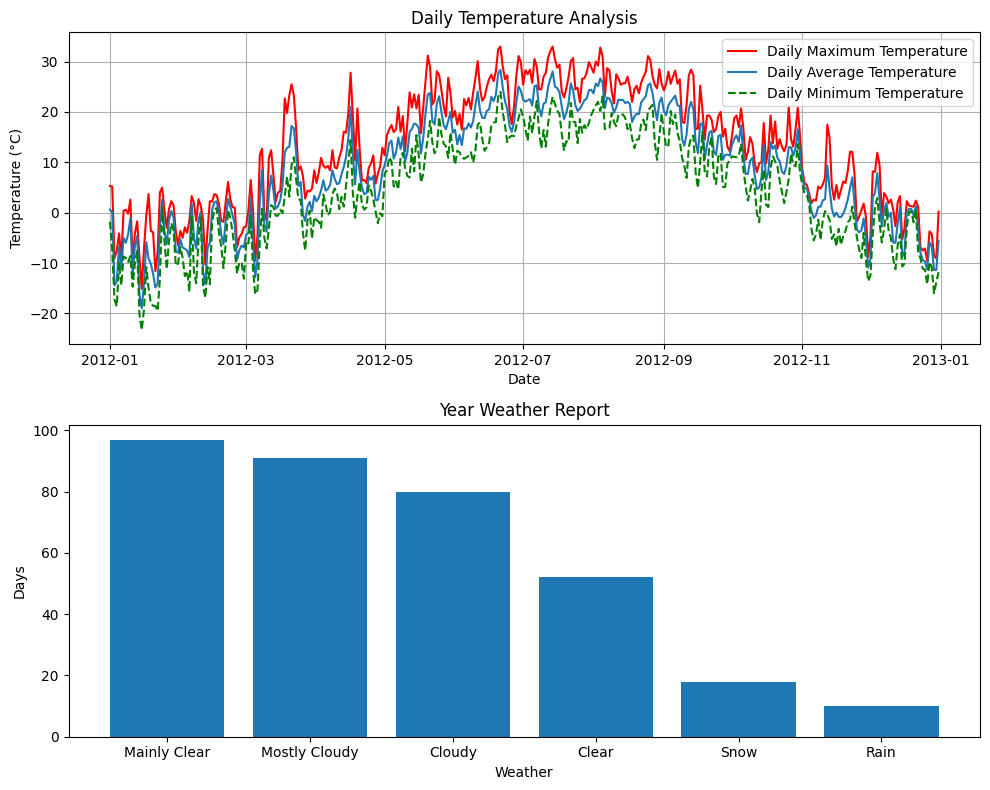

In [29]:
weather_count=daily_weather_temp["Weather"].value_counts().head(6)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(daily_max_temp['Date/Time'], daily_max_temp['Temp_C'], color='red', label="Daily Maximum Temperature")
axs[0].plot(daily_avg_temp['Date/Time'],daily_avg_temp['Temp_C'],label="Daily Average Temperature")
axs[0].plot(daily_min_temp['Date/Time'],daily_min_temp['Temp_C'],label="Daily Minimum Temperature",linestyle="--",color="green")
axs[0].set_title('Daily Temperature Analysis')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend()
axs[0].grid(True)
axs[1].bar(weather_count.index,weather_count.values)
axs[1].set_title('Year Weather Report')
axs[1].set_xlabel('Weather')
axs[1].set_ylabel('Days')


plt.tight_layout()
plt.show()
